# Pre Lab 05 : ODE

## Objectives

The main objectives of this lab are as follows.

- Become familiar with array slicing. This is a very powerful was of easily manipulating data, but does require some practice for it to become natural.
- Extend array slicing by slicing based on conditions.
- Have an opportunity to use `lambda` functions (if desired).
- Numerically solve a differential equation.

## Initialization

As always you should add initialization to the top of your notebook. Note that random numbers will be used in this prelab so initialize a random number generator called `rng` in this cell too in the now standard way.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Accessing Data in Arrays

In our never ending quest to avoid writing loops we need ways of accessing and changing data in arrays without needing to individually step through each element. We have seen that most operations and functions act on arrays exactly as we would expect (or hope) they would. We have also seen that array slicing provides a convenient way of accessing parts of an array. We will now study this more carefully.

### Indexing

We have already seen how to index elements in an array. Array indices start at zero, whether this seems strange or the obvious choice depends on how you think about arrays and the programming languages you have used. If you are familiar with pointers or references, then this is the obvious choice. Consider the array `a = [0, 0.25, 0.5, 0.75, 1]`.  In Python (and C and related languages) if we construct such an array, for example as `a = np.linspace(0, 1, 5)`, then we can think of `a` as pointing to the beginning of the array. Thus `a[0]` represents moving the pointer zero elements along the array, `a[1]` as moving the pointer one element along the array, and in general `a[j]` as moving `j` elements along the array.  This is represented in the figure below, where we see that `a[2]` is two steps along the array so it contains the value `0.5`. This choice can seem confusing in the sense that `a[2]` is the *third element* in the array, not the second.

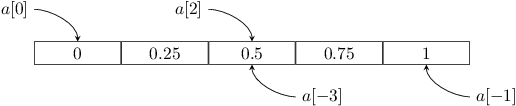

Similarly, this choice makes it easy to understand what it means to step backwards in an array. In particular `a[-1]` represents stepping one element backwards from the beginning of the array with the extra fact that we *wrap around* the array, so that we end up at the last element in it. We can then understand what any backwards step, `a[-j]`, means. For the example above this means that `a[-3]` is the same as `a[2]`.

Note that while this way of picturing negative indexing is nice, we should be careful not to push it to far. An array is not cyclic (it is not periodic). We *can* walk off the end or beginning of the array. Thus in the example above, `a[j]` is **not defined** for $j\ge 5$ or $j<-5$.

These ideas extend to two dimensional arrays. For a two dimensional array, `M`, then `M[i,j]` is the element from *row* `i` and column `j`. Again, both of these index values start from zero.

It is expected that you are comfortable accessing elements of an array. Feel free to generate arrays and play with pulling out specific elements of them.

###     Array Slicing

Array slicing is discussed in detail in Sections 2.2 and 3.4 of the *Guide to Numpy* (see the course syllabus for a link). We will only need basic slicing and will study some simple cases here.

#### One Dimension

The index we use to access elements of an array need not just be a single number. The generic structure is `[start:end:step]`. This will give a view of the array starting at index `start` and proceeding up to, *but not including*, index `end` in steps of `step`. We can leave out any of the values and use the defaults instead. The default for `start` is the first index (zero), the default for `end` is the length of the array, and the default for `step` is one. This means there are many ways to reference the whole array. Let `a` be a one dimensional array, then all the following are equivalent: `a`, `a[:]`, `a[::]`, `a[0:len(a)]`, `a[0:len(a):]`, `a[0::1]`, and `a[0:len(a):1]`. 

Array slicing is more than just a convenient way of viewing the data, it also allows us to *change* parts of the array. Technically, array slicing gives a *view* of the array. It **does not make a copy**, it really produces a "smart pointer" that allows us to examine and modify parts of an array. This is a very important and powerful feature. For the small arrays we will work with here it would not matter if we made copies, but if we were working with very large arrays this would be very important.

Let `a=np.arange(20)`. Use array slicing to print every third value of the array, that is, to print `a[0]`, `a[3]`, ....

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

For the array of **integers** `a` from the previous part, modify the array so that all the even elements are divided by 2, that is, replace all the even values by their values divided by 2. Print the modified array. (*Note:* Python supports in-place operators such as `+=`, `-=`, `*=`, `/=`, `//=`, and a few others that you may be familiar with from other languages. It does not, however, support `++` nor `--`.)

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

#### Higher Dimensions

Array slicing works for higher dimensional arrays also. Let `M` be a two dimensional array with 6 rows and 4 columns. Since NumPy arrays are accessed in row major order, the fourth row of the array can be accessed as `M[3,:]` or in shorthand as `M[3]`. The third column can be accessed as `M[:,2]`. Notice that to access a row we can use a shortcut but to access a column we must specify something about the rows. In the example of accessing the third column we are asking for all the rows (represented by the `:`).

For `M` a 6 by 4 array as discussed above state the size and the specific elements that will be accessed by `M[::2,::3]`. For example, this will access `M[0,0]`, what other elements will this access? How many rows and columns will be accessed? (*Note:* You should think about this first, then construct an example array and test your ideas.)

YOUR ANSWER HERE

### Conditional Slicing

The simple slicing discussed above is great if we have regularly spaced indices we wish to access. There are also techniques for selecting elements of an array based on other conditions. One way of doing this is through the `where` function provided by NumPy (you are now looking up its documentation). To become familiar with using it we will consider a simple example.

In [ ]:
a = np.linspace(0, 1, 20)
np.where(a >= 0.5)

By default the `where` function returns an array of index values for which the condition specified is true. Actually, if we look more closely at what is printed we see it really is returning a `tuple` of arrays. This is done because the `where` function also works for multidimensional arrays and it is returning the index values in a more general format. (This is discussed in the sections of the *Guide to Numpy* noted above.) This is "annoying" when working with 1 dimensional arrays when we are interested in the index values themselves (as opposed to the values in array `a`). A couple of common idioms for obtaining the array of index values in the one dimensional case are
```
ind = np.where(a >= 0.5)[0]
ind, = np.where(a >= 0.5)
```
Notice the comma in the second expression.

Construct an array of 20 random values between 0 and 1 using `rng.random`. Use the `where` function to find all values in this array larger than 0.5. Replace those values with one minus their value, that is "fold" them back to be in the interval $[0,0.5]$. Print the updated array.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

The previous question could be solved without using the `where` function. We can instead directly construct a boolean array showing where the condition is satisfied as seen here (run this cell).

In [ ]:
b = rng.random(size=20)
boolind = b > 0.5
print(b)
print(boolind)

This boolean array can also be used as an index. (Think about the following cells before you run them. What do you expect to happen and why? Then run them and make sense of the results for yourself!)

In [ ]:
# Only print the values satisfying our condition: b>0.5
print(b[boolind])

Finally, multiple conditions can be specified using the logical operator `|` for *or* and `&` for *and*. In doing so we must be careful about *order of operations*. It is best to enclose conditions in parentheses. The conditions can be specified in the same way in the `where` function and they create a boolean array. Again, it is best to look at some examples.

In [ ]:
a = np.linspace(0, 1, 20)
# Print all values smaller than 0.25 or larger than 0.75.
# We could do this with the where command or a boolean array,
# here I show the use of the where command.
ind = np.where((a < 0.25) | (a > 0.75))
print(a[ind])
# Print all the values between 0.25 and 0.75, inclusive.
# Here I show the use of a boolean array.
print(a[(a >= 0.25) & (a <= 0.75)])

Construct a 6 by 4 array of random values using `rng.random`. Print all values in the array less than 0.3 or between 0.5 and 0.8, inclusive.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### View Versus Copy

NumPy always tries to return a view of an array when it can, only making a copy when it is necessary. The exact rules for this depend on many details we have not discussed. For us this means that we must always be careful when assigning arrays, or slices of arrays, to variables; particularly if we then change some elements of the arrays or their slices. Things may not behave as we expect. This can lead to many hard to discover bugs, particularly when arrays are passed to functions and those functions change elements in the array they receive. We expect these changes to be localized to the function, but they are not!

If we are going to change elements of an array and we are uncertain if it is also stored and used under another name, it is best to make a copy of the array. For example
```
b = a.copy()
```
will ensure that `b` starts with the same elements as `a`, but is a copy, so changing `b` will not affect `a`.

To make this more clear consider the following cell. Think about what you expect `a`, `b`, `c`, and `d` to contain after this is run.

In [ ]:
a = np.arange(10)
b = a[::2]
b += 1
c = np.arange(10)
d = c[::2].copy()
d += 1

After you have thought about what you expect, print all four arrays.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Explain why the arrays have the values they have, and why.

YOUR ANSWER HERE

## Lane-Emden Equation

The Lane-Emden equation describes a self-gravitating, spherically symmetric, polytropic fluid.  It is often used as a (rather) simple model of a star. A polytropic fluid is one that satisfies the polytropic equation of state, $P \propto \rho^{1+1/n}$, where $P$ is the pressure, $\rho$ is the density, and $n$ is called the polytropic index. Written in dimensionless form, the Lane-Emden equation becomes the second order differential equation:
$$ \frac1{\xi^2} \frac{\mathrm{d}}{\mathrm{d}\xi} \left( \xi^2 \frac{\mathrm{d}\theta}{\mathrm{d}\xi} \right) + \theta^n = 0. $$
Here $\xi$ is a dimensionless radius and $\theta^n$ is proportional to the density (and so is also related to the pressure) in the fluid. See [Wikipedia](http://en.wikipedia.org/wiki/Lane%E2%80%93Emden_equation) for a brief discussion and derivation. For our purposes, this is just a differential equation we can solve numerically.

We now want to write a function that can be used by `scipy.integrate.solve_ivp` to solve this differential equation. *Before* starting to write code, clearly describe the **first order system of differential equations** and the choices you have made in defining your function. Yes, you do need to perform some mathematical manipulations *before* turning to the computer to reduce this equation to a set of first order equations. Typeset your resulting system using LaTeX.

YOUR ANSWER HERE

Write the code implementing the system of equations you described above. We want our function to *also* accept the parameter $n$ with the default value of zero. **You must document this function.** Though you should have always been doing this, **any non-trivial function must be documented** using a *docstring* as has been seen in many examples and solutions.

*Note*: I have chosen to write the function using notation `f(t,y)` since that is what appears in documentation for `solve_ivp`. There is nothing wrong with, and perhaps it is actually preferable, to change the names of the variables to something more representative of the problem we are solving.

In [ ]:
def lane_emden(t, y, n=0):
# YOUR CODE HERE
raise NotImplementedError()

### $n=0$ Polytrope

Whenever we solve a problem numerically we should try to find a case with a known solution to use as a test of our technique. The solution to the Lane-Emden equation for $n=0$ can directly be shown to be
$$ \theta(\xi) = C_0 - \frac{C_1}{\xi} - \frac16 \xi^2, $$
where $C_0$ and $C_1$ are constants determined from the initial conditions. We will use this result.

Solve the Lane-Emden equation for $n=0$ using `solve_ivp` and the initial conditions $\theta(0)=1$ and $\frac{\mathrm{d}\theta}{\mathrm{d}\xi}(0)=0$. Compare your numerical answer to the exact solution by producing a quick plot. (To calculate the exact solution you will need to solve for the constants $C_0$ and $C_1$ given these initial conditions -- think about what values make sense!). Make sure you integrate to a large enough $\xi$ so that $\theta$ becomes negative.

You were told to "compare" the results, what would be a smart way to compare them and show how well they agree? Even though this is "just" a quick plot, we should make sure it is clear what we are showing.

**Note:** Your system of equations should diverge numerically for $\xi=0$. To work around this start integrating from a small value of $\xi$ instead of zero, such as $\xi = 10^{-8}$. Also, we chose a default of `n=0` so we do not need to do anything special when calling the function we defined above.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### $n=2$ Polytrope

Now we will numerically solve the Lane-Emden equation for $n=2$.

To pass in the $n$ value we can use the `args` argument to `solve_ivp` or use a `lambda` function. See the example notebook from this week for how this is done in practice.

Since $\theta(\xi)$ is related to the density, when $\theta(\xi)=0$, the edge of the fluid has been reached. When applied to a star, this defines its radius. Find the value of $\xi$ for which $\theta(\xi) \simeq 0$. We have seen problems like this a few times. Here just get a **quick estimate** using the `where` function. In the lab you will be more careful. Print the value you find.

*Hint:* When using the `where` function it is easy to find all index values where $\theta<0$.  We do not want all of them, just the smallest value of $\xi$ for which this condition is met.

*Note:* Alternatively, this is a case where we can some practicing using the `events` keyword to `solve_ivp`.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Turning in the PreLab

All prelabs will be handled as was done for PreLab01.  See that file for details.  It will be assumed from now on that you have read and understood the procedure and what it means when you submit a prelab.